In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shai-music-genre-classification-2/test (2).csv
/kaggle/input/shai-music-genre-classification-2/sample_submission (2).csv
/kaggle/input/shai-music-genre-classification-2/train (1).csv


# **Importing data**

In [2]:
train_df=pd.read_csv("/kaggle/input/shai-music-genre-classification-2/train (1).csv")
test_df=pd.read_csv("/kaggle/input/shai-music-genre-classification-2/test (2).csv")

In [3]:
train_df.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


 here we return the first 5 rows of the train dataframe just to make a look and take a quick idea

In [4]:
test_df.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,Juan Pablo Vega,Matando (feat. Vic Mirallas),NaN,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14398,Kappi Kat,Baarish,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,14399,Plain White T's,Hey There Delilah,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,NaN,0.1140,0.298,103.971,232533.0,4
3,14400,WALK THE MOON,Different Colors,52.0,0.480,0.826,NaN,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,14401,Peled,◊ß◊®◊ô◊ñ,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,NaN,0.0672,0.805,76.030,118439.0,4


 here we return the first 5 rows of the test dataframe

# **EDA and data cleaning**

In [5]:
train_df.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


as we see from the above describtion (samary statistic)
 * The popularity , key and instrumentalness attributes have null values that we will deal with later .
 * The loudness , speechiness , acousticness , instrumentalness and  liveness are skewed .

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

above we print information about a DataFrame including the index dtype and columns, non-null values,as we said that popularity, key and instrumentalness attributes have null values. 

In [7]:
train_df.isnull().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

checking the number of null values in each column

In [8]:
train_df['mode'].head()

0    0
1    1
2    1
3    1
4    0
Name: mode, dtype: int64

<Axes: >

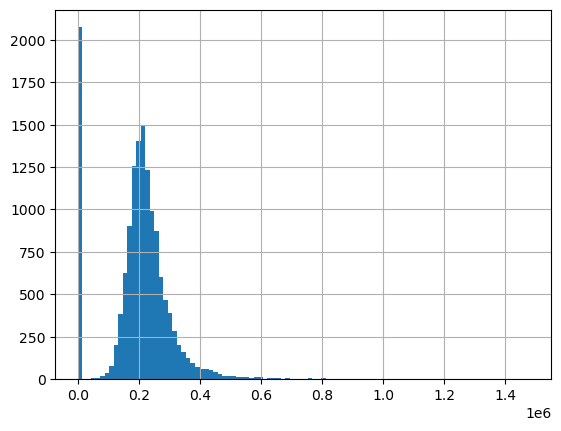

In [9]:
train_df['duration_in min/ms'].hist(bins=100)

In [10]:
q1=train_df['duration_in min/ms'].quantile(0.25)
q3=train_df['duration_in min/ms'].quantile(0.75)
iqr=q3-q1
print(q1-1.5*iqr)

35243.875


In [11]:

ms_mask = train_df['duration_in min/ms'] >= q1-1.5*iqr  # Check if values are greater than or equal to 60,000 milliseconds
train_df['duration_in min/ms'] = np.where(ms_mask, train_df['duration_in min/ms'] / (60 * 1000), train_df['duration_in min/ms'] )



In [12]:
q1=test_df['duration_in min/ms'].quantile(0.25)
q3=test_df['duration_in min/ms'].quantile(0.75)
iqr=q3-q1
print(q1-1.5*iqr)
ms_mask = test_df['duration_in min/ms'] >= q1-1.5*iqr  # Check if values are greater than or equal to 60,000 milliseconds
test_df['duration_in min/ms'] = np.where(ms_mask, test_df['duration_in min/ms'] / (60 * 1000), test_df['duration_in min/ms'] )

41996.375


In [13]:
train_df['duration_in min/ms'].describe()

count    14396.000000
mean         3.920388
std          1.406217
min          0.501650
25%          3.122217
50%          3.663342
75%          4.374250
max         29.886000
Name: duration_in min/ms, dtype: float64

In [14]:
train_df['duration_in min/ms'].isnull().sum()

0

In [15]:
train_df['Class'].value_counts()

10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: Class, dtype: int64

#  A Histogram for each numeric data attribute

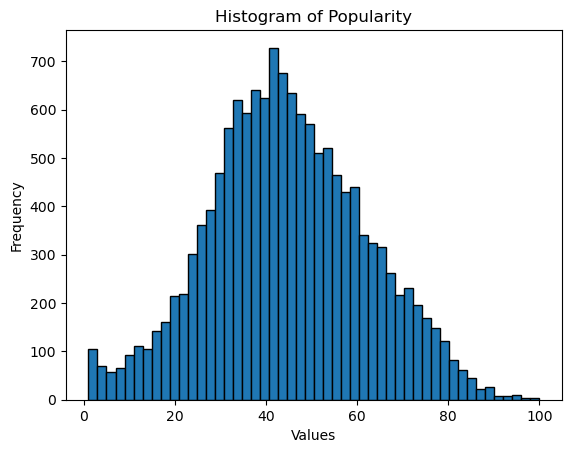

In [16]:
plt.hist(train_df['Popularity'], bins=50, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Popularity')
plt.show()

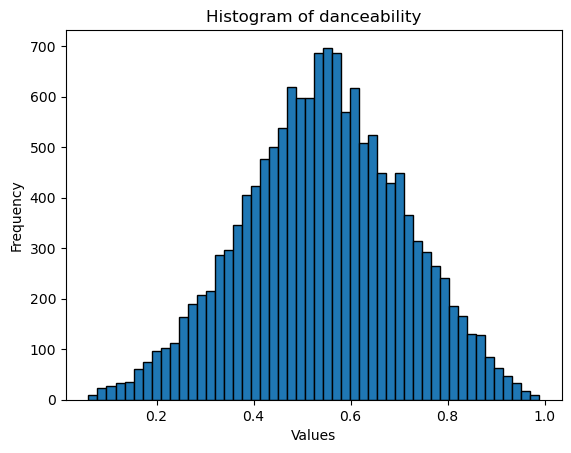

In [17]:
plt.hist(train_df['danceability'], bins=50, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of danceability')
plt.show()

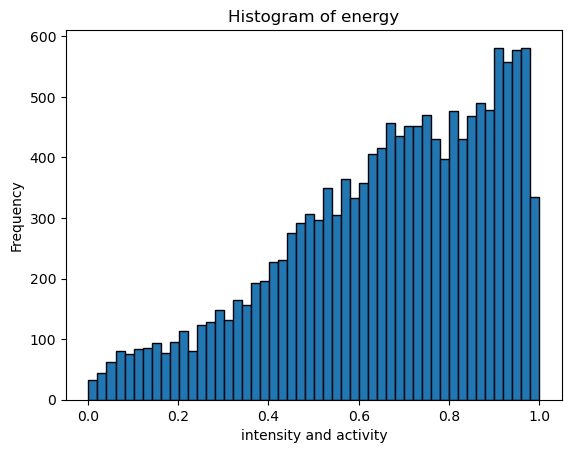

In [18]:
plt.hist(train_df['energy'], bins=50, edgecolor='black')
plt.xlabel('intensity and activity')
plt.ylabel('Frequency')
plt.title('Histogram of energy')
plt.show()

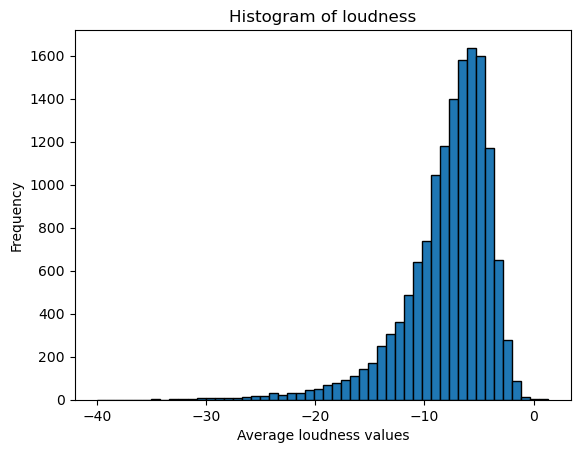

In [19]:
plt.hist(train_df['loudness'], bins=50, edgecolor='black')
plt.xlabel('Average loudness values')
plt.ylabel('Frequency')
plt.title('Histogram of loudness')
plt.show()

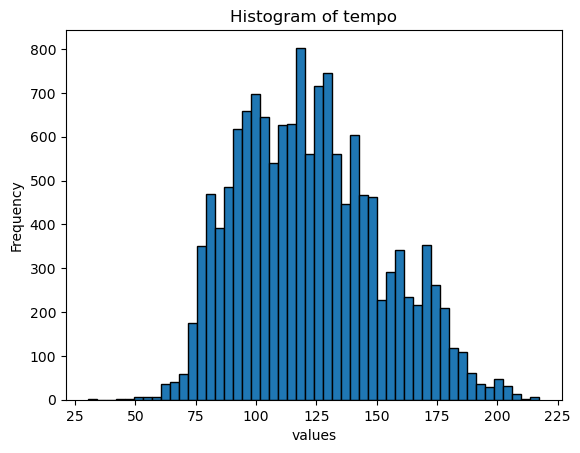

In [20]:
plt.hist(train_df['tempo'], bins=50, edgecolor='black')
plt.xlabel('values')
plt.ylabel('Frequency')
plt.title('Histogram of tempo')
plt.show()

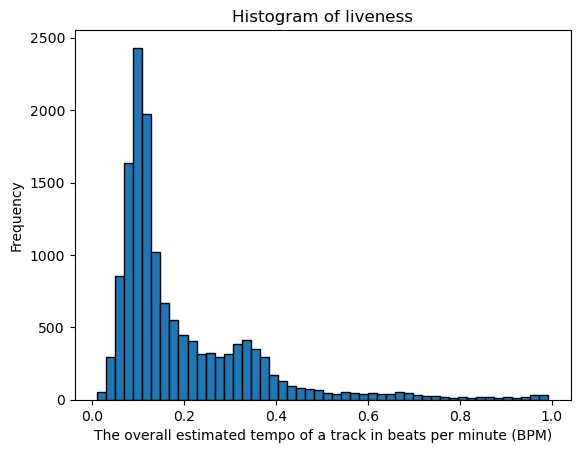

In [21]:
plt.hist(train_df['liveness'], bins=50, edgecolor='black')
plt.xlabel('The overall estimated tempo of a track in beats per minute (BPM)')
plt.ylabel('Frequency')
plt.title('Histogram of liveness')
plt.show()

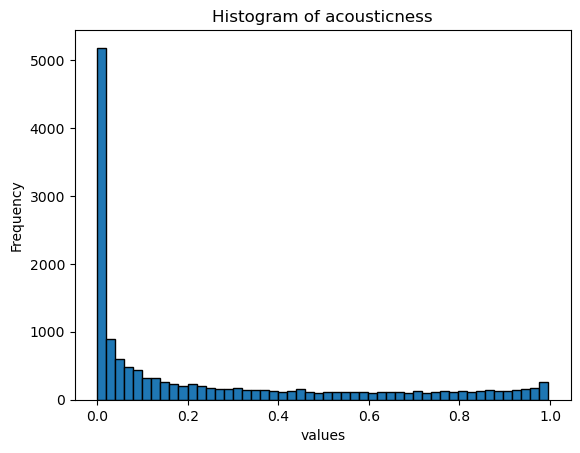

In [22]:
plt.hist(train_df['acousticness'], bins=50, edgecolor='black')
plt.xlabel('values')
plt.ylabel('Frequency')
plt.title('Histogram of acousticness')
plt.show()

The loudness , speechiness , acousticness , instrumentalness and  liveness are skewed .

<Axes: >

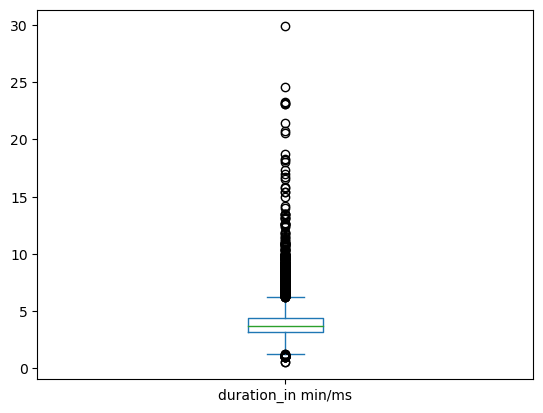

In [23]:
train_df['duration_in min/ms'].plot(kind='box')

In [24]:
train_df['Popularity'].fillna(train_df['Popularity'].mean(),inplace=True)

filling the null values with the median of the column

In [25]:
 train_df['instrumentalness'].fillna(train_df['instrumentalness'].median(),inplace=True)

filling the null values with the median of the column , we didn't use the mean because the data is skewed and the median is the most appropriate value to fill

In [26]:
 train_df['key'].fillna(train_df['key'].mean(),inplace=True)

filling the null values with the mean of the column

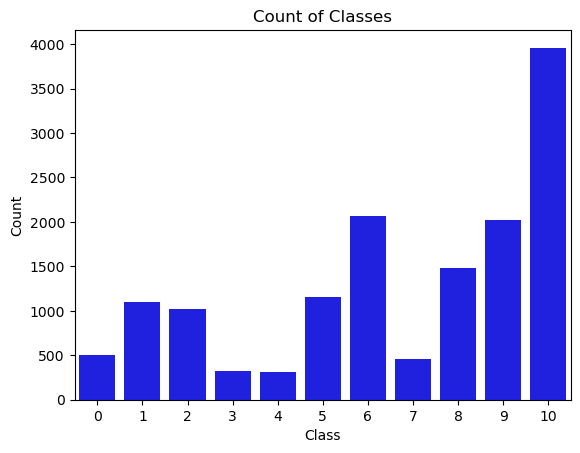

In [27]:
g=sns.countplot(data=train_df,x='Class',color='b');
g.set_title('Count of Classes')
g.set(xlabel='Class',ylabel='Count')
plt.show()

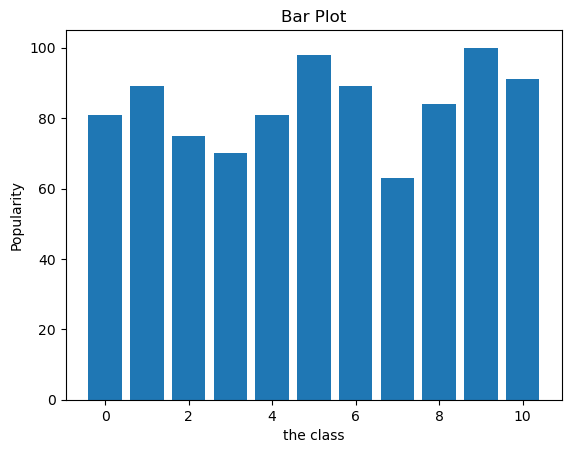

In [28]:
plt.bar(train_df['Class'],train_df['Popularity'])
plt.xlabel('the class')
plt.ylabel('Popularity')
plt.title('Bar Plot')
plt.show()

In [29]:
X_test=test_df.drop(columns=['Id','Artist Name','Track Name'])
X_test.isna().sum()
popm=X_test['Popularity'].median()
keym=X_test['key'].median()
insm=X_test['instrumentalness'].median()


X_test['Popularity']=X_test['Popularity'].replace(np.nan,popm)
X_test['key']=X_test['key'].replace(np.nan,keym)
X_test['instrumentalness']=X_test['instrumentalness'].replace(np.nan,insm)
X_test.isnull().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64

# Correlation( statistical analysis )

/tmp/ipykernel_20/3088728714.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(),annot=True,cmap="BuPu" )


<Axes: >

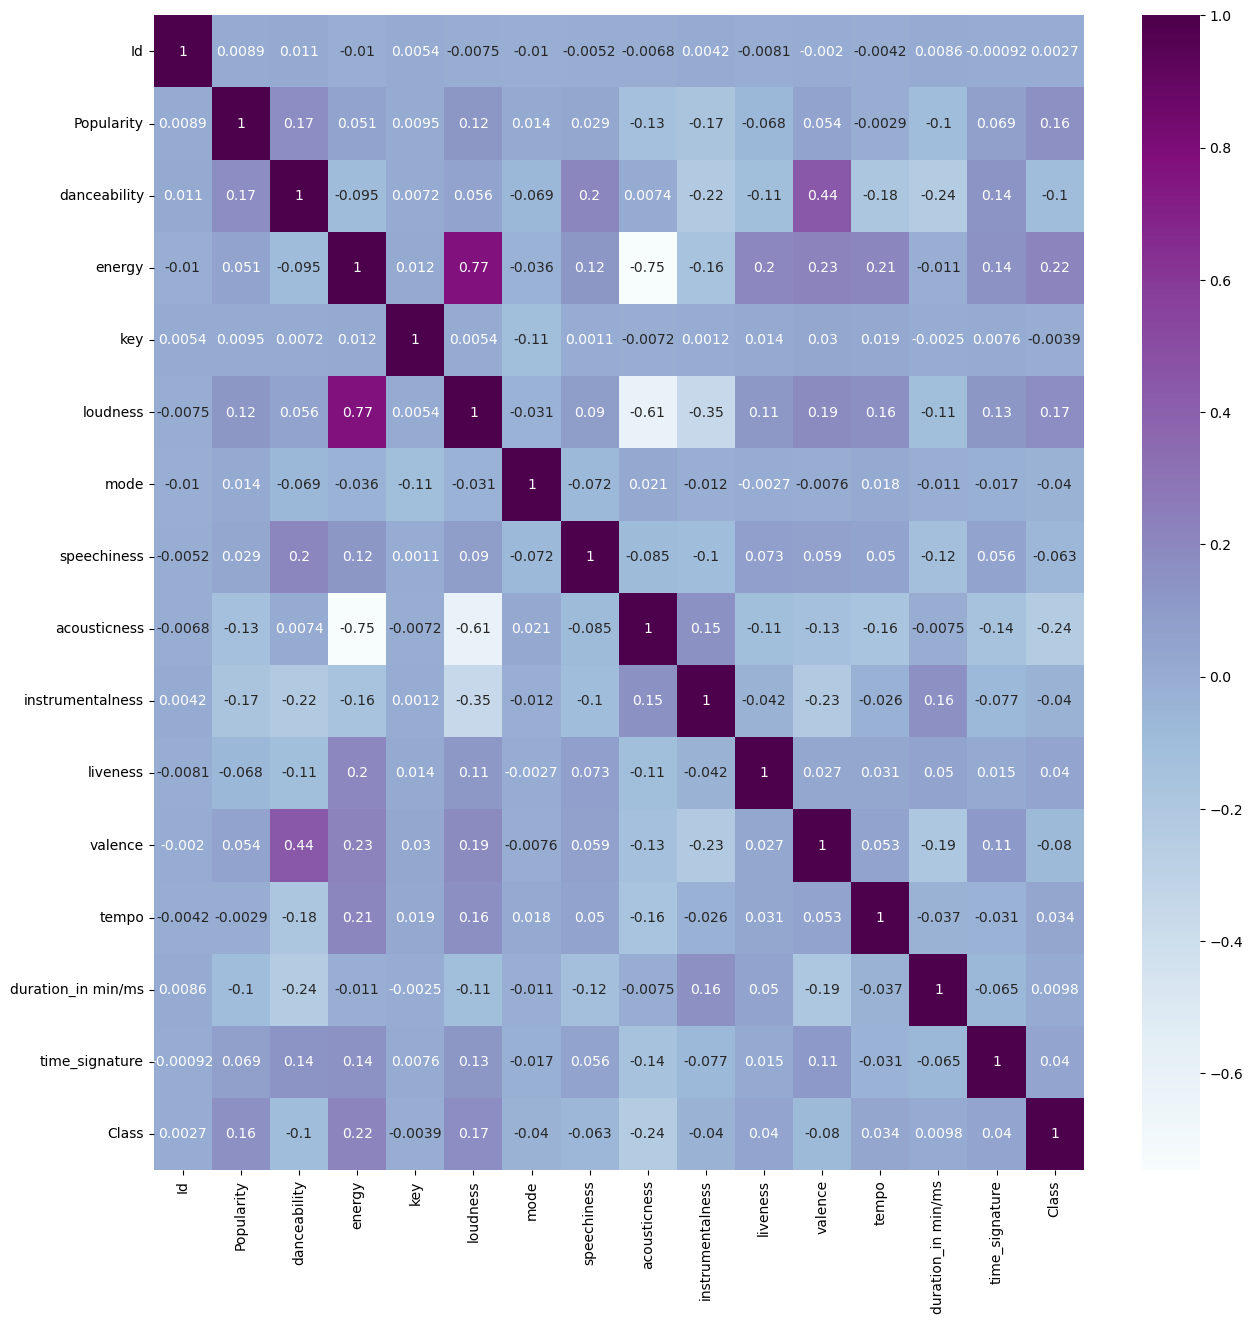

In [30]:
plt.figure(figsize=(15, 15))
sns.heatmap(train_df.corr(),annot=True,cmap="BuPu" )

checking for linear relationship between variables ,and as we see there is no srtong linear relationship between the features and the label (class column)

# Build A model

In [31]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from sklearn.metrics import classification_report

In [32]:
X=train_df.drop(columns=['Id','Artist Name','Track Name','Class'])
Y=train_df['Class']

In [33]:
from sklearn.preprocessing import StandardScaler


# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
train_prepared = scaler.fit_transform(X)
test_prepared=scaler.fit_transform(X_test)

In [34]:
from sklearn import model_selection
kfold=model_selection.KFold(n_splits=10,random_state=10,shuffle=True)

In [35]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_tes, y_train, y_tes = train_test_split(X, Y, test_size=0.2, random_state=48)


In [36]:
smote = SMOTE(random_state=4)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_smote).items()))

[(0, 3156), (1, 3156), (2, 3156), (3, 3156), (4, 3156), (5, 3156), (6, 3156), (7, 3156), (8, 3156), (9, 3156), (10, 3156)]


In [37]:
X_train_smote.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,39.000000,0.731,0.780,1.000000,-4.903,1,0.0978,0.124000,0.000176,0.0847,0.536,90.024,2.763783,4
1,51.000000,0.553,0.640,5.953781,-9.246,1,0.0288,0.010900,0.003920,0.2050,0.478,104.989,2.493717,4
2,44.525208,0.420,0.985,6.000000,-4.362,1,0.1090,0.000047,0.000029,0.2770,0.506,111.566,3.170750,4
3,33.000000,0.362,0.968,9.000000,-2.629,0,0.0741,0.000007,0.002040,0.0672,0.427,164.167,4.741967,4
4,33.000000,0.159,0.760,1.000000,-5.090,1,0.0402,0.485000,0.003690,0.9330,0.551,189.333,6.124883,4


In [38]:
from xgboost import XGBClassifier
model2=XGBClassifier(n_estimators=25,max_depth=4,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.25,reg_lambda=0.2,learning_rate=0.19)
#best so far: model2=XGBClassifier(n_estimators=100,max_depth=4,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.25,reg_lambda=0.2,learning_rate=0.19)

model2.fit(X_train_smote,y_train_smote,early_stopping_rounds=10,eval_metric='mlogloss',eval_set=[(X_tes,y_tes)])

y2=model2.predict(X_train_smote)
print(model_selection.cross_val_score(model2,X_train_smote,y_train_smote,cv=kfold))
print((model_selection.cross_val_score(model2,X_train_smote,y_train_smote,cv=kfold)).mean())

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:2.23193
[1]	validation_0-mlogloss:2.12186
[2]	validation_0-mlogloss:2.04988
[3]	validation_0-mlogloss:1.98492
[4]	validation_0-mlogloss:1.93473
[5]	validation_0-mlogloss:1.89160
[6]	validation_0-mlogloss:1.85701
[7]	validation_0-mlogloss:1.82484
[8]	validation_0-mlogloss:1.79783
[9]	validation_0-mlogloss:1.77326
[10]	validation_0-mlogloss:1.75052
[11]	validation_0-mlogloss:1.73139
[12]	validation_0-mlogloss:1.71557
[13]	validation_0-mlogloss:1.70075
[14]	validation_0-mlogloss:1.68511
[15]	validation_0-mlogloss:1.67177
[16]	validation_0-mlogloss:1.66077
[17]	validation_0-mlogloss:1.65086
[18]	validation_0-mlogloss:1.64190
[19]	validation_0-mlogloss:1.63271
[20]	validation_0-mlogloss:1.62379
[21]	validation_0-mlogloss:1.61578
[22]	validation_0-mlogloss:1.60977
[23]	validation_0-mlogloss:1.60249
[24]	validation_0-mlogloss:1.59469
[0.61664747 0.60829493 0.61261521 0.61837558 0.609447   0.61866359
 0.59809853 0.59579372 0.62662057 0.60674157]
0.6111298172348372


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_train_smote,y2))

              precision    recall  f1-score   support

           0       0.56      0.75      0.64      3156
           1       0.48      0.30      0.37      3156
           2       0.56      0.55      0.56      3156
           3       0.83      0.86      0.84      3156
           4       0.64      0.86      0.73      3156
           5       0.75      0.86      0.80      3156
           6       0.50      0.29      0.37      3156
           7       0.89      0.97      0.93      3156
           8       0.68      0.82      0.74      3156
           9       0.55      0.47      0.50      3156
          10       0.49      0.40      0.44      3156

    accuracy                           0.65     34716
   macro avg       0.63      0.65      0.63     34716
weighted avg       0.63      0.65      0.63     34716



<Axes: >

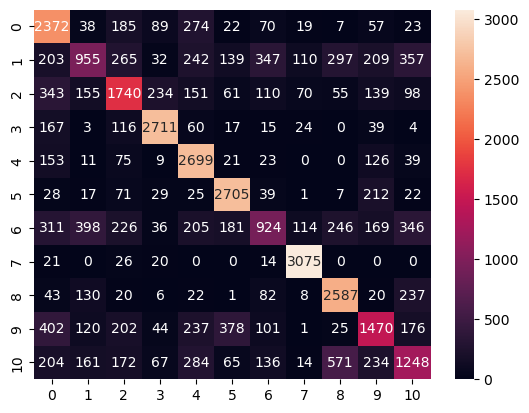

In [40]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train_smote,y2),annot=True,fmt='d')

In [41]:
y_train_smote[0:5]

0    10
1     1
2     8
3     8
4     9
Name: Class, dtype: int64

In [42]:
y2[0:5]


array([ 5, 10,  8,  8,  2])

In [43]:
from sklearn.metrics import f1_score
f1_score(y_train_smote, y2,average='micro')

0.6477128701463303

In [44]:
(y_train_smote==y2).sum()

22486

In [45]:
(y_train_smote!=y2).sum()

12230

In [46]:
yhat_test=model2.predict(X_test)

In [47]:
yhat_test[1:19]

array([ 0,  9, 10,  5,  6,  5,  9,  5,  1,  8,  9,  5,  6, 10,  3,  5, 10,
        8])

In [48]:
df=test_df[['Id']]

In [49]:
h=pd.DataFrame(yhat_test)

In [50]:
dfres=pd.merge(df,h,left_index=True,right_index=True)

In [51]:
dfres=dfres[['Id',0]]
dfres.rename(columns={0:'Class'},inplace=True)

In [52]:
dfres.head()

,Id,Class
0,14397,1
1,14398,0
2,14399,9
3,14400,10
4,14401,5


In [53]:
dfres.to_csv('results.csv',index=False)